# Funciones de agregación




In [39]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

Las personas dueñas de la compañía quedaron tan satisfechas con los análisis de nos piden realizar algunos análisis de los productos:

* ¿Cuántas unidades fueron compradas de cada producto?
* ¿Cuál fue el monto de venta total, venta promedio y máxima de cada producto? 
* ¿Cuáles es el cliente que realizó la compra máxima de cada producto?
* Para los dos productos con más ventas ¿Cómo se distribuyeron el monto de ventas durante los meses del año? 

Para ello vamos a necesitar utilizar funciones de agregación


# 1. Análisis inicial de datos

Repetimos el análisis inicial de datos previo

In [3]:
# Leemos el dataset desde el link
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=True")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [4]:
# Renombramos las columnas
df.rename(columns={'account number': 'numero_cuenta', 'name':'nombre', 'sku':'producto', 'quantity': 'cantidad',
                   'unit price':'precio_unitario', 'ext price':'total_ventas', 'date':'fecha'}, inplace=True)

Vamos a utilizar los métodos `pandas.info()` y `pandas.describe()` para conocer el dataset 

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   numero_cuenta    1500 non-null   int64  
 1   nombre           1500 non-null   object 
 2   producto         1500 non-null   object 
 3   cantidad         1500 non-null   int64  
 4   precio_unitario  1500 non-null   float64
 5   total_ventas     1500 non-null   float64
 6   fecha            1500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 82.2+ KB


1. **¿Cuáles son las observaciones?**

  Son las lineas de ventas de una companía 

2. **¿Cuáles son las variables?**

  El numero de cuenta, el nombre, el codigo de producto, la cantidad vendida, el precio unitario, el total de ventas y la fecha.

Observamos que no hay valores faltantes

# 2. Agregaciones

Las dos primeras preguntas se pueden contestar utilizando el procedimiento `groupby-aggregate`

* ¿Cuántas unidades fueron compradas de cada producto?
* ¿Cuál fue el monto de venta total, venta promedio y máxima de cada producto? 

Dependiendo de la forma en la que se plantee el código es posible responder todas las preguntas en una misma tabla de resultados






¿Cuántas unidades fueron compradas de cada producto?

In [10]:
# Agrupamos por producto
grupo_productos = df.groupby(by = 'producto',as_index = False)

In [17]:
cantidad_productos = grupo_productos.agg(
    cantidad_total=pd.NamedAgg(column='cantidad', aggfunc='sum')
)
cantidad_productos

,producto,cantidad_total
0,B1-04202,1056
1,B1-05914,1105
2,B1-20000,1309
3,B1-33087,1163
4,B1-33364,1270
5,B1-38851,1324
6,B1-50809,964
7,B1-53102,982
8,B1-53636,1370
9,B1-65551,1187


¿Cuál fue el monto de venta total, venta promedio y máxima de cada producto? 

In [19]:
grupo_productos.agg(
    venta_total = pd.NamedAgg(column = 'total_ventas',aggfunc = 'sum'),
    venta_promedio = pd.NamedAgg(column = 'total_ventas',aggfunc = 'mean'),
    venta_maxima=pd.NamedAgg(column ='total_ventas', aggfunc='max'),
)


,producto,venta_total,venta_promedio,venta_maxima
0,B1-04202,65177.35,1357.861458,4770.72
1,B1-05914,61555.27,1256.230000,4031.25
2,B1-20000,81505.54,1537.840377,4414.62
3,B1-33087,62169.92,1412.952727,4708.41
4,B1-33364,75649.75,1543.872449,4824.54
5,B1-38851,81593.09,1457.019464,4057.04
6,B1-50809,46572.03,1194.154615,3897.00
7,B1-53102,56216.37,1147.272857,4014.90
8,B1-53636,71064.01,1340.830377,3793.73
9,B1-65551,56359.15,1199.130851,4300.08


In [37]:
#Juntando todo
grupo_productos.agg(
    cantidad_vendida = pd.NamedAgg('cantidad','sum'),
    venta_total=pd.NamedAgg(column='total_ventas', aggfunc='sum'),
    venta_promedio=pd.NamedAgg(column='total_ventas', aggfunc='mean'),
    venta_maxima=pd.NamedAgg(column='total_ventas', aggfunc='max'),
)

,producto,cantidad_vendida,venta_total,venta_promedio,venta_maxima
0,B1-04202,1056,65177.35,1357.861458,4770.72
1,B1-05914,1105,61555.27,1256.230000,4031.25
2,B1-20000,1309,81505.54,1537.840377,4414.62
3,B1-33087,1163,62169.92,1412.952727,4708.41
4,B1-33364,1270,75649.75,1543.872449,4824.54
5,B1-38851,1324,81593.09,1457.019464,4057.04
6,B1-50809,964,46572.03,1194.154615,3897.00
7,B1-53102,982,56216.37,1147.272857,4014.90
8,B1-53636,1370,71064.01,1340.830377,3793.73
9,B1-65551,1187,56359.15,1199.130851,4300.08


# 3. Transform

Para contestar la pregunta:

¿Cuál es el cliente que realizó la compra máxima de cada producto?

Vamos a utilizar un proceso de `groupby-transform`

Para ello es necesario:

1. Obtener el monto máximo de ventas de un producto cliente
2. Crear la columna
3. Filtrar los datos de manera acorde a la pregunta


In [20]:
# Creamos una columna con la venta máxima por producto (recordar que ya tenemos el dataset agrupado)
df['venta_maxima_producto'] = grupo_productos['total_ventas'].transform('max')

In [22]:
# Observamos el resultado
df[['nombre','producto','total_ventas','venta_maxima_producto']].sample(10)

,nombre,producto,total_ventas,venta_maxima_producto
1331,Pollich LLC,S2-11481,1071.59,3578.27
271,Kuhn-Gusikowski,S2-83881,2297.88,4444.30
1436,"Fritsch, Russel and Anderson",B1-33364,3232.66,4824.54
374,"Cronin, Oberbrunner and Spencer",S2-77896,92.16,3993.36
447,Will LLC,S2-10342,1151.25,4543.96
777,Keeling LLC,S1-93683,919.23,4621.04
195,Barton LLC,B1-20000,2278.92,4414.62
620,Sanford and Sons,B1-04202,725.99,4770.72
614,Kuhn-Gusikowski,B1-65551,1285.20,4300.08
124,"Fritsch, Russel and Anderson",S1-65481,2148.37,2859.56


In [25]:
# Filtrar por la condicion de la pregunta
df.query("total_ventas == venta_maxima_producto")[['nombre','producto','total_ventas','venta_maxima_producto']].sort_values('venta_maxima_producto', ascending = True)

,nombre,producto,total_ventas,venta_maxima_producto
786,Kuhn-Gusikowski,S1-65481,2859.56,2859.56
817,"Cronin, Oberbrunner and Spencer",S2-82423,3203.90,3203.90
347,Herman LLC,S1-06532,3428.01,3428.01
189,Purdy-Kunde,S2-16558,3443.20,3443.20
109,Kulas Inc,B1-86481,3547.19,3547.19
90,"Halvorson, Crona and Champlin",S2-11481,3578.27,3578.27
702,Kulas Inc,S1-82801,3589.52,3589.52
1442,Trantow-Barrows,B1-69924,3712.41,3712.41
744,Jerde-Hilpert,S1-30248,3791.62,3791.62
765,"Fritsch, Russel and Anderson",B1-53636,3793.73,3793.73


# 4. Trabajo con fechas

La pregunta que involucra una frecuencia temporal es:


Para los dos productos con más ventas ¿Cómo se distribuyeron el monto de ventas durante los meses del año?

Para ello vamos a utilizar el objeto `pandas.Grouper`. 

In [26]:
# Convertimos la fecha a datetime
df['fecha']= pd.to_datetime(df.fecha,format = 'mixed')

In [31]:
# Con la información de la primera pregunta podemos obtener los dos productos con más ventas
top_2_productos = cantidad_vendida_productos.nlargest(n=2, columns='cantidad_total')['producto']
list(top_2_productos)

['S2-77896', 'S1-47412']

In [33]:
# Construimos un dataframe sólo con esos productos
df_top_2_productos = df.loc[df['producto'].isin(list(top_2_productos))]
df_top_2_productos.sample(5)

,numero_cuenta,nombre,producto,cantidad,precio_unitario,total_ventas,fecha,venta_maxima_producto
729,672390,Kuhn-Gusikowski,S2-77896,10,50.41,504.10,2014-06-20 22:22:45,3993.36
47,218895,Kulas Inc,S1-47412,1,94.01,94.01,2014-01-13 08:36:18,4162.40
5,714466,Trantow-Barrows,S2-77896,17,87.63,1489.71,2014-01-02 10:07:15,3993.36
374,257198,"Cronin, Oberbrunner and Spencer",S2-77896,4,23.04,92.16,2014-03-30 18:12:17,3993.36
77,527099,Sanford and Sons,S1-47412,27,77.69,2097.63,2014-01-18 23:43:24,4162.40


In [36]:
# Agrupamos por producto y mes
df_top_2_productos.groupby(by=['producto',pd.Grouper(key='fecha',freq='ME')]).agg(
    ventas_totales=('total_ventas','sum')
).reset_index()

,producto,fecha,ventas_totales
0,S1-47412,2014-01-31,4850.80
1,S1-47412,2014-02-28,12210.55
2,S1-47412,2014-03-31,11205.95
3,S1-47412,2014-04-30,14394.19
4,S1-47412,2014-05-31,7811.97
5,S1-47412,2014-06-30,494.16
6,S1-47412,2014-07-31,10248.90
7,S1-47412,2014-08-31,3215.02
8,S1-47412,2014-09-30,6052.09
9,S1-47412,2014-10-31,12483.03


<Axes: xlabel='fecha', ylabel='ventas_totales'>

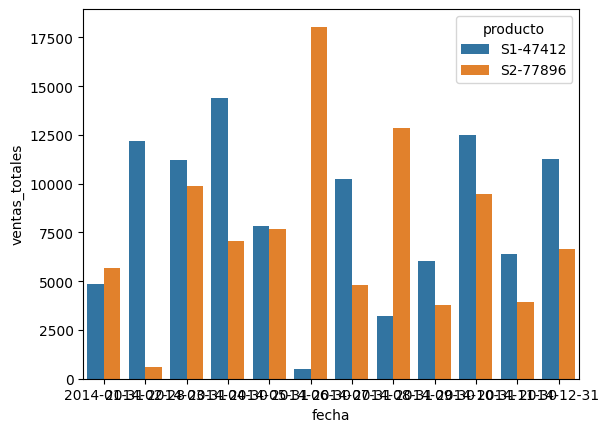

In [43]:
data = df_top_2_productos.groupby(by=['producto', pd.Grouper(key='fecha', freq='ME')]).agg(
    ventas_totales=('total_ventas', 'sum')
).reset_index()
sns.barplot(x='fecha', y='ventas_totales',
            hue='producto', data=data)